# **1. Set up**

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import chi2_contingency

import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [171]:
car = pd.read_csv('/content/Case_study_CarPrice_Assignment.csv')

In [172]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# **2. Check Data**

In [173]:
# Kiểm tra kiểu dữ liệu
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [174]:
# Kiểm tra số lượng giá trị duy nhất của từng cột
car.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

- Chúng ta có bộ dữ liệu: 205 dòng và 26 cột
- Bộ dữ liệu không có Null value
- Bộ dữ liệu không có Duplicated value
- Bộ dữ liệu có dtypes:
  * float64 = 8
  * int64 = 8
  * object = 10

# **3. Bài làm**

## Hiểu ý nghĩa của từng thuộc tính được cung cấp trong bộ dữ liệu

### Mô tả dữ liệu

- car_ID : Mã xe
- symboling: Mức độ an toàn (giá trị trong khoảng từ -2 tới 3, trong đó giá trị -2: tuyệt đối an toàn, 3: có rủi ro)
- carName: Tên xe
- fueltype: Loại nhiên liệu
- aspiration: loại hút (turbo hoặc std)
- doornumber: Số lượng cửa
- carbody: Loại thân xe (sedan, wagon, hatchback)
- drivewheel: Loại bánh xe
- enginelocation: Vị trí động cơ
- wheelbase: Chiều dài cơ sở
- carlength: Chiều dài xe
- carwidth: Chiều rộng xe
- carheight: Chiều cao xe
- curbweight: Trọng lượng của xe khi không có người hoặc hành lý
- enginetype: Loại động cơ
- cylindernumber: Số lượng xi lanh đặt trong xe
- enginesize: Kích thước động cơ
- fuelsystem: Hệ thống nhiên liệu của xe ô tô
- boreratio: Tỉ số hành trình
- stroke: số kỳ hoăc kích thước bên trong động cơ
- compressionratio: Tỉ số nén của ôtô
- horsepower: Mã lực
- peakrpm: Tốc độ động cơ cao nhất
- citympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố
- highwaympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc
- price: Giá xe

### Xem cấu trúc và tổng quát thống kê

In [175]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


- Bộ dữ liệu có 205 các mẫu xe, mỗi mẫu có các thuộc tính duy nhất; kích thước, trọng lượng, công suất khác nhau giữa các loại xe.
- Khoảng giá:
  * Min Price: 5,118.00

  * Max Price: 45,400.00

  * Mean Price: 13,276.71
- Động cơ đa dạng (enginetype), mỗi loại động cơ có tỉ số hành trình (boreratio) và kích thước bên trong động cơ (stroke) khác nhau
- Xếp hạng rủi ro (symboling) thay đổi từ -2 tới 3
- Các đặc điểm về kích thước (wheelbase, carlength, carwidth, carheight), trọng lượng xe khi không có người hoặc hành lý (curbweight), kích thước động cơ (enginesize) có nhiều sự thay đổi cho mỗi loại xe.
- Các chỉ số về tỉ số nén (compressionratio), mã lực (horsepower) cũng có nhiều sự thay đổi theo mẫu xe
- Các kết quả cho thấy bộ dữ liệu khá đồng đều


## Phân tích bộ dữ liệu

### Tìm mối liên hệ giữa hãng xe và tên xe, phát hiện và sửa sai dữ liệu

In [176]:
# Đếm giá trị CarName
car['CarName'].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [177]:
car[['CarName', 'Model']] = car['CarName'].str.split(' ', expand=True, n=1)
car.insert(3, 'Model', car.pop('Model'))
car.rename(columns={'CarName': 'Brand'}, inplace=True)
car.drop('car_ID', axis=1, inplace=True)

In [178]:
car.head()

,symboling,Brand,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [179]:
car_pivot = car.pivot_table(index='Brand', columns='Model', values='price', aggfunc='count').fillna(0)
car_pivot.head()

Model,100 ls,100ls,1131 deluxe sedan,12tl,144ea,145e (sw),244dl,245,246,264gl,...,vega 2300,versa,x1,x3,x4,x5,xf,xj,xk,z4
Brand,,,,,,,,,,,,,,,,,,,,,
Nissan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alfa-romero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
audi,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bmw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0
buick,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
chi2_contingency(car_pivot)

Chi2ContingencyResult(statistic=4998.796176821983, pvalue=1.5462258300033867e-37, dof=3780, expected_freq=array([[0.00492611, 0.00985222, 0.00492611, ..., 0.00492611, 0.00492611,
        0.00492611],
       [0.01477833, 0.02955665, 0.01477833, ..., 0.01477833, 0.01477833,
        0.01477833],
       [0.03448276, 0.06896552, 0.03448276, ..., 0.03448276, 0.03448276,
        0.03448276],
       ...,
       [0.04433498, 0.08866995, 0.04433498, ..., 0.04433498, 0.04433498,
        0.04433498],
       [0.05418719, 0.10837438, 0.05418719, ..., 0.05418719, 0.05418719,
        0.05418719],
       [0.00985222, 0.01970443, 0.00985222, ..., 0.00985222, 0.00985222,
        0.00985222]]))

- H0: không tương quan
- H1: có tương quan
- p-value = 1.5462258300033867e-37 < 0.05 -> bác bỏ giả thuyết không tương quan.
- Brand và Model tương quan với nhau.

=> Brand và Model có mối quan hệ tương quan lẫn nhau nên ta sẽ lấy Brand để đưa vào phân tích xây dựng mô hình, vì Model có quá nhiều giá trị có thể gây ảnh hưởng tới tệp dữ liệu

In [181]:
# Đếm giá trị của cột Brand, phát hiện và sửa các giá trị sai
car['Brand'].value_counts()

Brand
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [182]:
# Thay thế các giá trị sai
car['Brand'].replace('maxda', 'mazda', inplace=True)
car['Brand'].replace('Nissan', 'nissan', inplace=True)
car['Brand'].replace('porcshce', 'porsche', inplace=True)
car['Brand'].replace('toyouta', 'toyota', inplace=True)
car['Brand'].replace('vokswagen', 'volkswagen', inplace=True)
car['Brand'].replace('vw', 'volkswagen', inplace=True)

In [183]:
car['Brand'].value_counts()

Brand
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

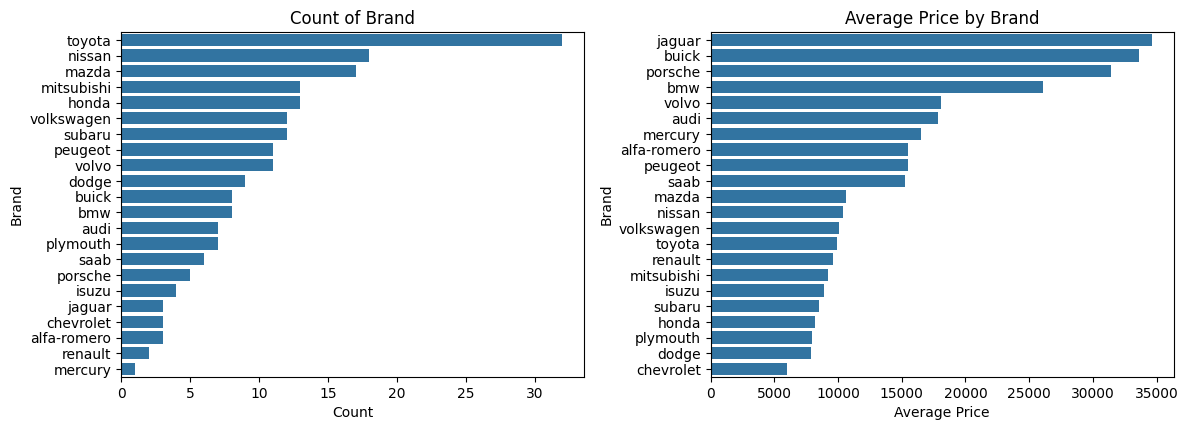

In [184]:
# Brand vs price
car.drop('Model', axis=1, inplace=True)
brand_price = car.groupby('Brand')['price'].mean().reset_index().sort_values(by='price', ascending=False)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(y='Brand', data=car, order=car['Brand'].value_counts().index)
plt.title('Count of Brand')
plt.xlabel('Count')
plt.ylabel('Brand')

plt.subplot(2, 2, 2)
sns.barplot(y='Brand', x='price', data=brand_price)
plt.title('Average Price by Brand')
plt.xlabel('Average Price')
plt.ylabel('Brand')

plt.tight_layout()
plt.show()

- Toyota đang là hãng xe được sử dụng phổ biến nhất
- Mercury đang là hãng xe ít được sử dụng
- Jaguar đang là thương hiệu có giá xe trung bình cao nhất, kế đến là Buick và Pocrche
- Chevrolet đang là thương hiệu có giá xe trung bình thấp nhất
- Ta có thể thấy giá xe trung bình đang phụ thuộc vào thương hiệu

### Xem xét kiểu dữ liệu của các thuộc tính, thực hiện chuyển đổi về đúng kiểu

In [185]:
# Liệt kê các cột có thuộc tính là định lượng
numerical_features = car.select_dtypes(include=['int64', 'float64']).columns
for i in numerical_features:
  print(f"{i}")
  print(f"{car[i].unique()}\n")

symboling
[ 3  1  2  0 -1 -2]

wheelbase
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1]

carlength
[168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 173.  172.4 165.3 170.2 165.6 162.4 173.4 181.7 184.6
 178.5 186.7 198.9 167.3 168.9 175.7 181.5 186.6 156.9 157.9 172.  173.5
 173.6 158.7 169.7 166.3 168.7 176.2 175.6 183.5 187.8 171.7 159.3 165.7
 180.2 183.1 188.8]

carwidth
[64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 62.5 66.  61.8 69.6 70.6 64.2 65.7 66.5 66.1 70.3 71.7
 70.5 72.  68.

In [186]:
# Liệt kê các cột có thuộc tính là định tính
categorical_features = car.select_dtypes(include=['object']).columns
for i in categorical_features:
  print(i, car[i].unique())

Brand ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
fueltype ['gas' 'diesel']
aspiration ['std' 'turbo']
doornumber ['two' 'four']
carbody ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel ['rwd' 'fwd' '4wd']
enginelocation ['front' 'rear']
enginetype ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


- Ta thấy cột (doodoornumber) và (cylindernumber) có thể chuyển đổi về dạng dữ liệu số biểu thị cho số lượng cửa và số lượng xi lanh trong xe

In [187]:
# Tạo từ điển cho chuyển đổi và tiến hành chuyển đổi kiểu dữ liệu
dictionary_doornumber = {'two': 2, 'four': 4}
dictionary_cylindernumber = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
car['doornumber'] = car['doornumber'].map(dictionary_doornumber).astype(int)
car['cylindernumber'] = car['cylindernumber'].map(dictionary_cylindernumber).astype(int)

In [188]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   Brand             205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

### Tiến hành phân tích mối liên hệ của từng thuộc tính với price

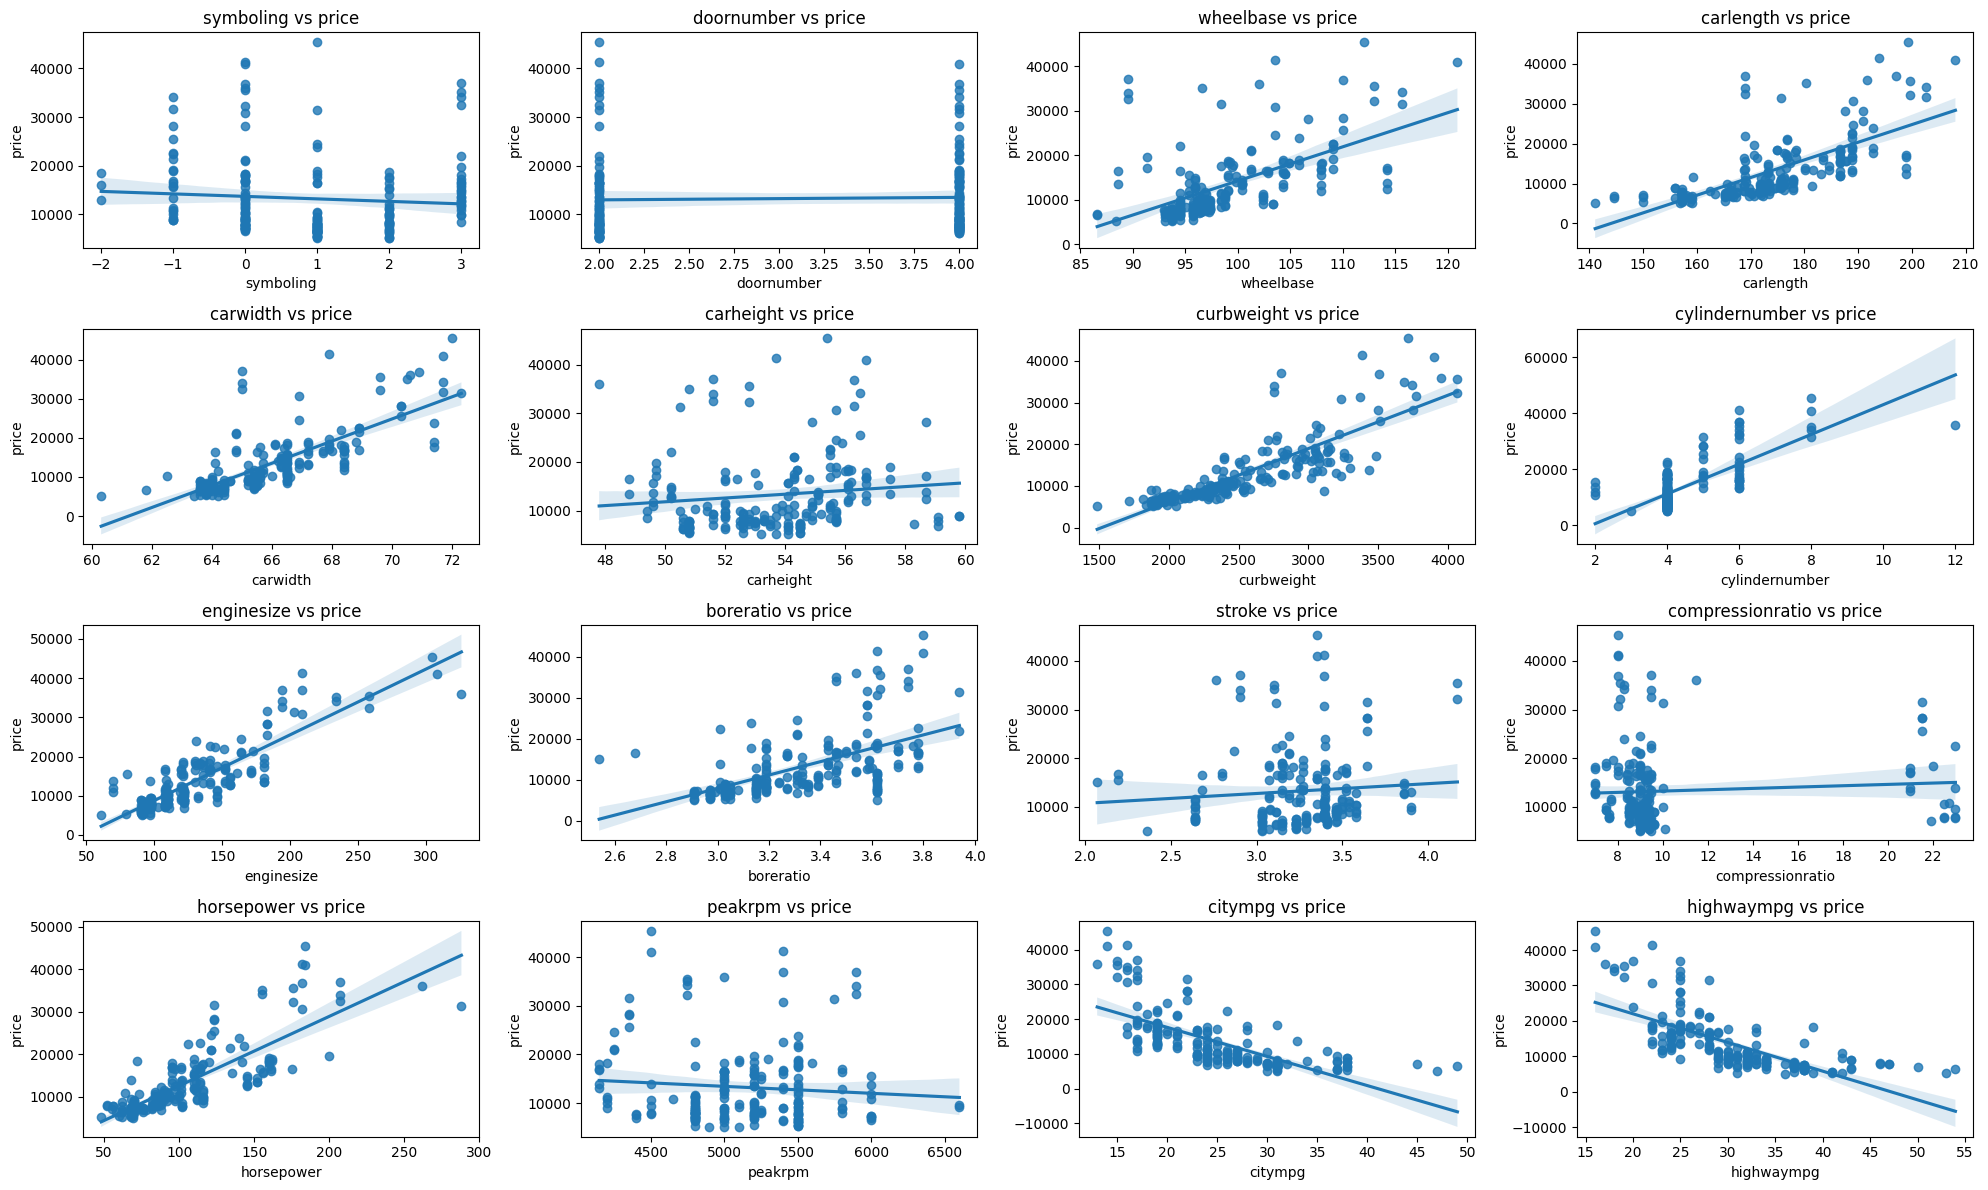

In [189]:
# numerical_features vs price
numerical_features = car.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('price')

plt.figure(figsize=(20, 12))

for i, feature in enumerate(numerical_features):

  plt.subplot(4, 4, i+1)
  sns.regplot(x=feature, y='price', data=car)
  plt.title(f'{feature} vs price')
  plt.xlabel(feature)
  plt.ylabel('price')

plt.tight_layout()
plt.show()

In [190]:
# kiểm định tương quan
for i in numerical_features:
  print(f"{i}")
  print(f"{stats.pearsonr(car[i], car['price'])}\n")

symboling
PearsonRResult(statistic=-0.07997822464270349, pvalue=0.2543117584863517)

doornumber
PearsonRResult(statistic=0.03183526584560969, pvalue=0.650448395329912)

wheelbase
PearsonRResult(statistic=0.5778155982921501, pvalue=1.182820486337694e-19)

carlength
PearsonRResult(statistic=0.6829200156779621, pvalue=1.6787066240745445e-29)

carwidth
PearsonRResult(statistic=0.7593252997415115, pvalue=9.627437876118924e-40)

carheight
PearsonRResult(statistic=0.11933622657049445, pvalue=0.08832832352274969)

curbweight
PearsonRResult(statistic=0.8353048793372968, pvalue=1.2144448264030345e-54)

cylindernumber
PearsonRResult(statistic=0.7183049020002832, pvalue=8.028863372444576e-34)

enginesize
PearsonRResult(statistic=0.8741448025245117, pvalue=1.3547637598648963e-65)

boreratio
PearsonRResult(statistic=0.5531732367984437, pvalue=7.907922278248891e-18)

stroke
PearsonRResult(statistic=0.079443083881931, pvalue=0.2575137159090866)

compressionratio
PearsonRResult(statistic=0.067983505799

- Ta có thể thấy các đặc trưng có p-value > 0.05 là:
  - symboling
  - doornumber
  - carheight
  - stroke
  - compressionratio
  - peakrpm

=> Các đặc trưng này không có mối tương quan cụ thể với giá


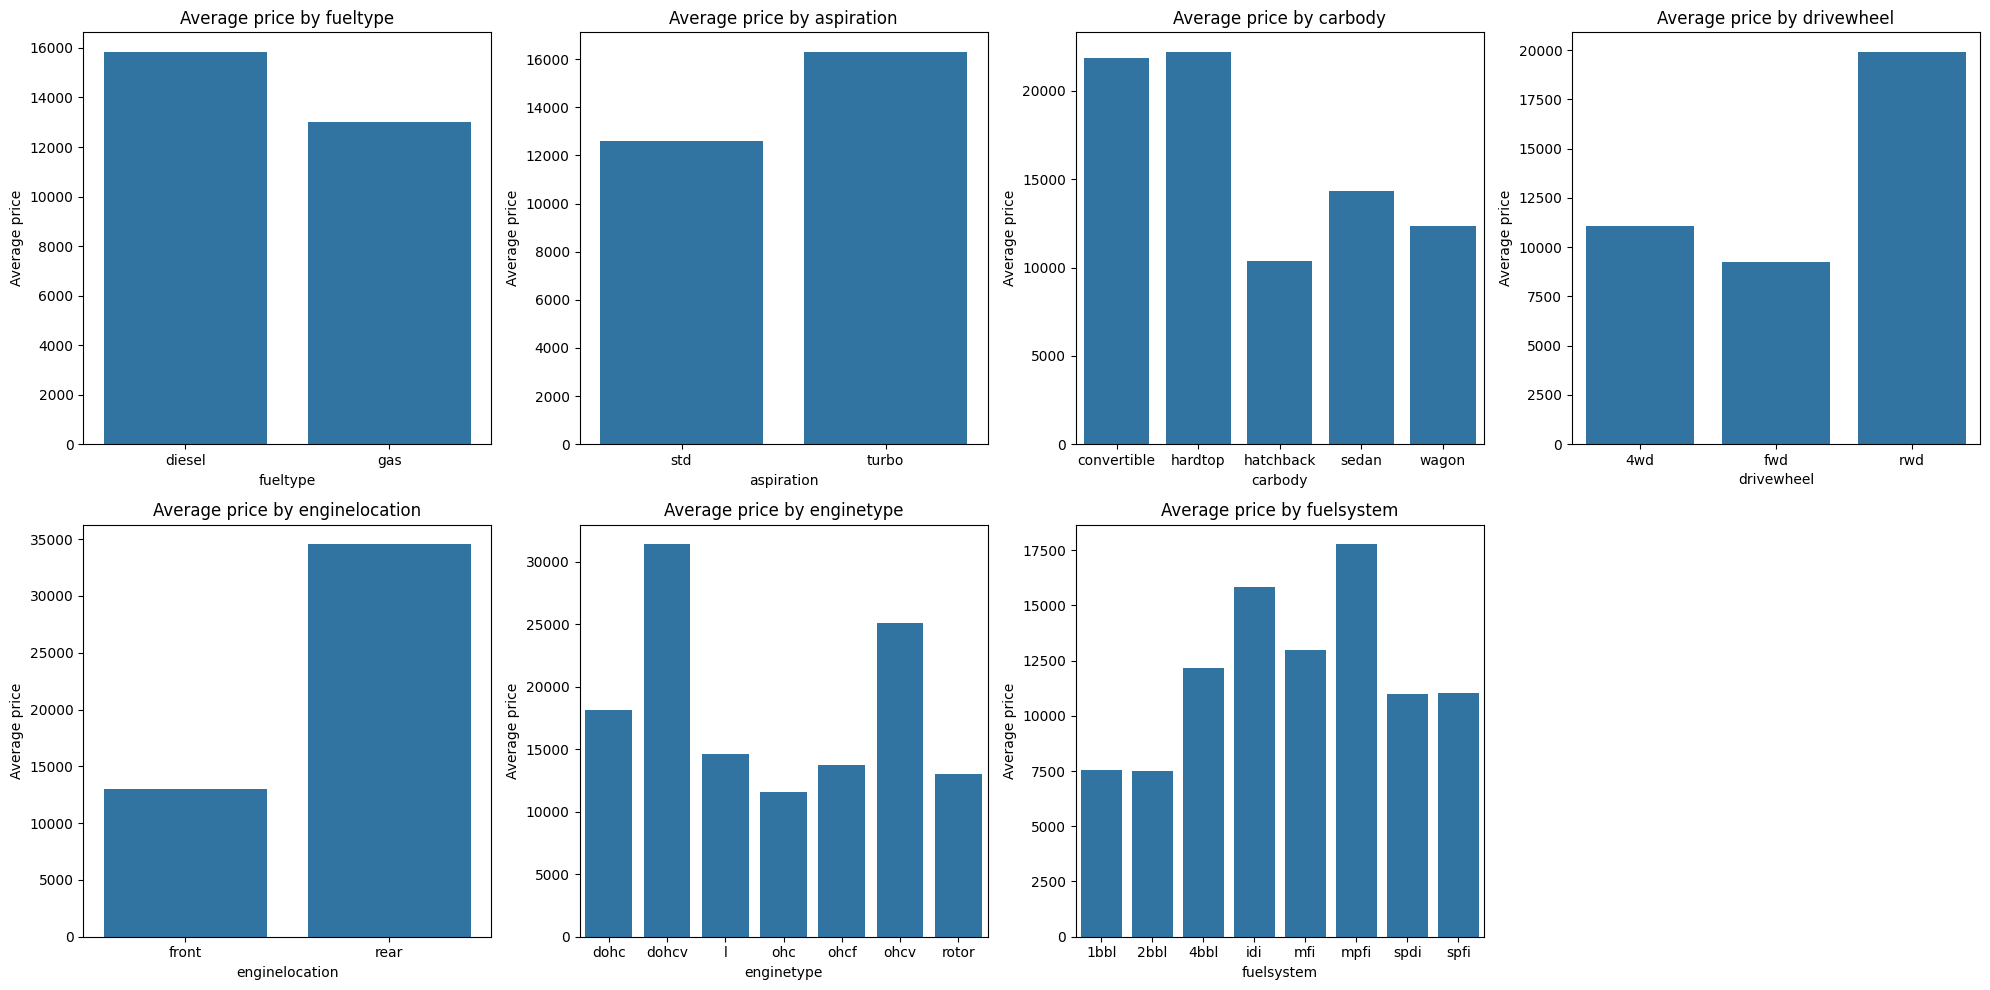

In [191]:
# categorical_features vs price
categorical_features = car.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop('Brand')

plt.figure(figsize=(20, 10))
# sử dụng enumerate, có thể duyệt qua các phần tử của iterable (danh sách, tuple, chuỗi...) và đồng thời có được chỉ số của từng phần tử.
# để trả về các chỉ sổ index cũng như giá trị của từng phần từ có trong iterable
for i, feature in enumerate(categorical_features):

  ave_categorical_features = car.groupby(feature)['price'].mean().reset_index()
  plt.subplot(2, 4, i+1)
  sns.barplot(x=feature, y='price', data=ave_categorical_features)
  plt.title(f'Average price by {feature}')
  plt.xlabel(feature)
  plt.ylabel('Average price')

plt.tight_layout()
plt.show()

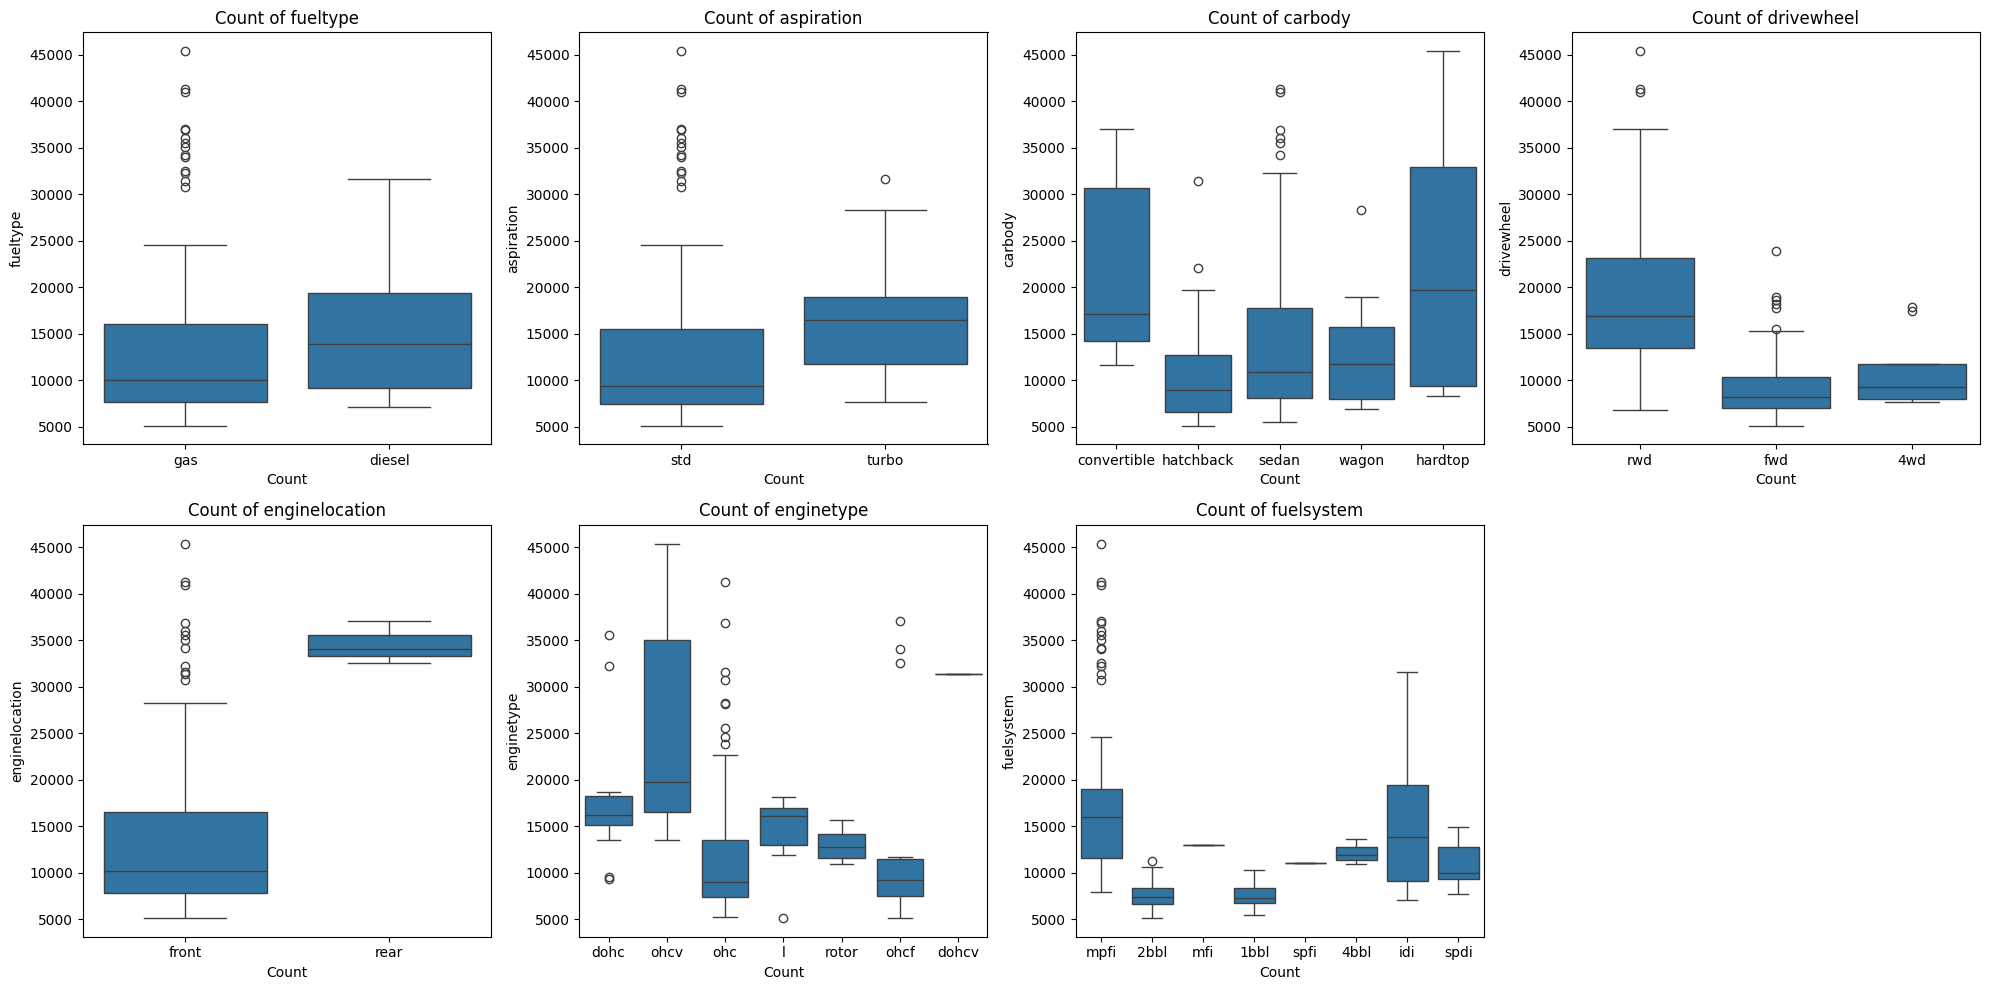

In [192]:
plt.figure(figsize=(20, 10))

for i, feature in enumerate(categorical_features):

  plt.subplot(2, 4, i+1)
  sns.boxplot(x=feature, y='price', data=car)
  plt.title(f'Count of {feature}')
  plt.xlabel('Count')
  plt.ylabel(feature)

plt.tight_layout()
plt.show()

### Nhận xét các thuộc tính gây ảnh hưởng tới giá

- citympg, highwaympg: càng thấp thì giá càng cao (tương quan nghịch)
- carheight, compressionratio, stroke, peakrpm, doornumber: không ảnh hưởng tới giá, các giá trị phân bố khá đều ở các mốc
- wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower: các biến này có giá trị tăng thì giá cũng tăng
- symboling, cylindernumber: mức độ an toàn và số lượng động cơ không thực sự ảnh hưởng tới giá

- fueltype, aspiration: không thực sự ảnh hưởng tới giá vì có sự chênh lệch về giá trung bình nhưng không quá lớn, chứa khá nhiều giá trị ngoại lai
- carbody, drivewheel, enginelocation, enginetype: cho thấy sự chênh lệch về giá trung bình khá rõ ràng đây có thể là yếu tố gây ảnh hưởng tới giá.
- fuelsystem: có thể ảnh hưởng tới giá nhưng mức độ chênh lệch có thể chứa các giá trị ngoại lai.


### Vẽ biểu đồ heatmap biểu diễn mức độ tương quan giữa các biến định lượng

In [193]:
# Chọn các cột có biến định lượng
heatmap_columns = car.select_dtypes(include=['int64', 'float64']).columns
heatmap_columns = heatmap_columns.drop('price')

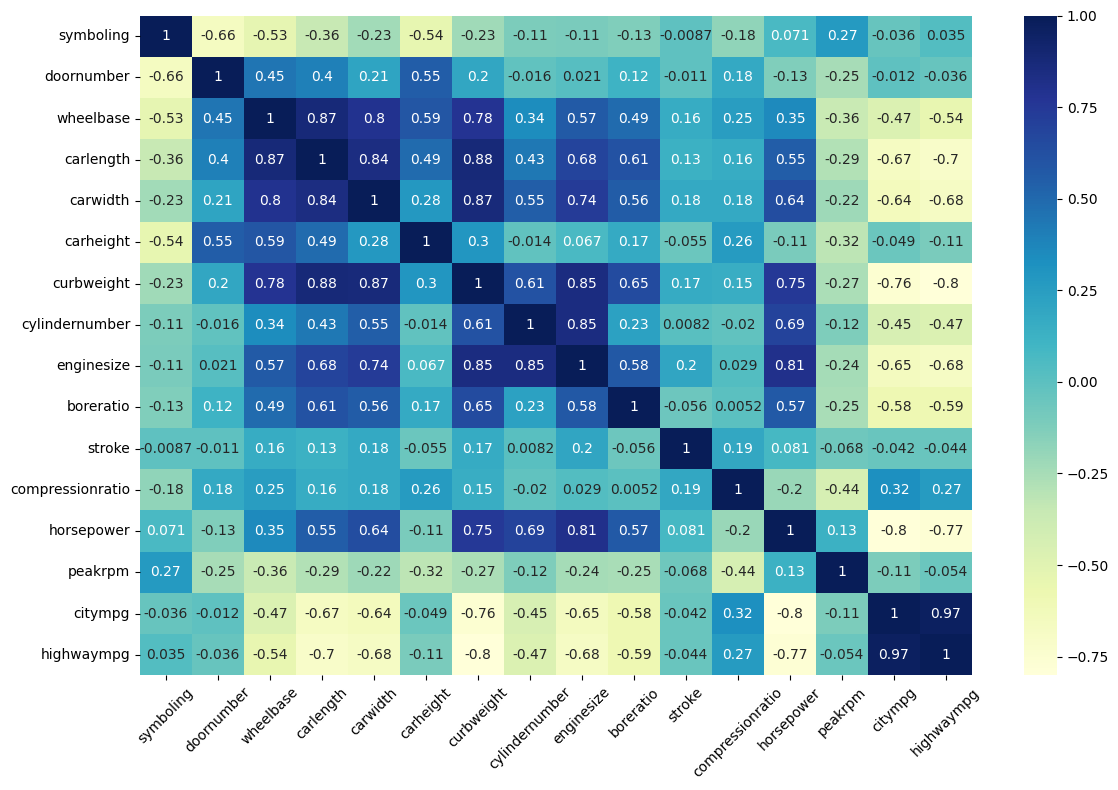

In [194]:
plt.figure(figsize=(12, 8))
sns.heatmap(car[heatmap_columns].corr(), annot=True, cmap='YlGnBu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Tiến hành mã hóa tạo ra các biến dummy từ các biến category (thang đo nominal) ban đầu

In [195]:
categorical_features = car.select_dtypes(include=['object']).columns
categorical_features

Index(['Brand', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')

In [196]:
pd.get_dummies(car, columns=categorical_features, drop_first=True, dtype=int)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,1,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,...,0,0,0,0,0,0,0,1,0,0
201,-1,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,...,0,0,0,0,0,0,0,1,0,0
202,-1,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,...,0,1,0,0,0,0,0,1,0,0
203,-1,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,...,0,0,0,0,0,1,0,0,0,0


### Xây dựng mô hình hồi quy tuyến tính bằng thư viện sklearn

In [197]:
# Loại bỏ các đặc trưng không tương quan hoặc ít gây ảnh hưởng tới giá
car.drop(columns = ['fueltype', 'carbody', 'aspiration', 'symboling', 'wheelbase', 'cylindernumber', 'doornumber', 'carheight', 'stroke', 'compressionratio', 'peakrpm', 'enginelocation'], axis=1, inplace=True)

In [198]:
car.head()

,Brand,drivewheel,carlength,carwidth,curbweight,enginetype,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero,rwd,168.8,64.1,2548,dohc,130,mpfi,3.47,111,21,27,13495.0
1,alfa-romero,rwd,168.8,64.1,2548,dohc,130,mpfi,3.47,111,21,27,16500.0
2,alfa-romero,rwd,171.2,65.5,2823,ohcv,152,mpfi,2.68,154,19,26,16500.0
3,audi,fwd,176.6,66.2,2337,ohc,109,mpfi,3.19,102,24,30,13950.0
4,audi,4wd,176.6,66.4,2824,ohc,136,mpfi,3.19,115,18,22,17450.0


In [199]:
car.shape

(205, 13)

In [200]:
# Tạo các đặc trưng và biến phụ thuộc
X = car.drop('price', axis=1)
y = car['price']

In [201]:
X = pd.get_dummies(X, drop_first=True, dtype=int)
X.head()

,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,Brand_audi,Brand_bmw,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,168.8,64.1,2548,130,3.47,111,21,27,0,0,...,0,0,0,0,0,0,0,1,0,0
1,168.8,64.1,2548,130,3.47,111,21,27,0,0,...,0,0,0,0,0,0,0,1,0,0
2,171.2,65.5,2823,152,2.68,154,19,26,0,0,...,0,1,0,0,0,0,0,1,0,0
3,176.6,66.2,2337,109,3.19,102,24,30,1,0,...,0,0,0,0,0,0,0,1,0,0
4,176.6,66.4,2824,136,3.19,115,18,22,1,0,...,0,0,0,0,0,0,0,1,0,0


In [202]:
# Tách dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [203]:
# Xây mô hình
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [204]:
lr.coef_

array([-6.58493064e+01,  8.17812183e+02,  4.16056128e+00,  5.29465349e+01,
       -2.33407634e+03,  2.04636561e+01,  2.73770423e+00,  7.06967734e+00,
        4.43721170e+02,  6.63742797e+03,  6.09378398e+03, -2.29622498e+03,
       -2.82301783e+03, -1.09153667e+03, -2.30130812e+03,  2.52230195e+03,
       -2.16345478e+03, -2.00904692e+03, -3.77843254e+03, -2.25370128e+03,
       -1.82813987e+03, -3.14176628e+03,  1.01562453e+04,  2.27373675e-13,
       -1.34506860e+02, -6.52879104e+03, -2.83102233e+03, -2.03958514e+03,
        4.74699723e+02,  2.67131645e+02,  6.35093139e+02,  0.00000000e+00,
       -1.82813987e+03, -1.03091930e+03,  3.62745428e+03, -2.68410216e+03,
        4.19359000e+03,  1.39852612e+03,  3.13853975e+02,  1.04083155e+03,
       -4.81802531e+01,  1.50249607e+03,  1.39100106e+03,  9.65288561e+02])

In [205]:
lr.intercept_

-40958.10325611578

In [206]:
# Đánh giá kết quả mô hình
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [207]:
print(f"\nMean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 2381.69890966809
R-squared Score: 0.8446592944620256
Mean Squared Error: 12025911.70641543
Root Mean Squared Error: 3467.8396310117096


In [208]:
car['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

- Mức giá đang chênh lệch với mean price 13276.71 là khoảng 2381.69

=> Mô hình có tính hiệu quả nhất định, có thể sử dụng

### Xây dựng mô hình hồi quy tuyến tính trên các biến được chọn bởi phương pháp feature selection.

In [209]:
# Chọn các đặc trưng numerical_features và mục tiêu
numerical_features = car.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('price')
target = 'price'

In [210]:
# Chọn các đặc trưng categorical_features, mã hóa
categorical_features = car.select_dtypes(include=['object']).columns
car_encoded = pd.get_dummies(car, columns=categorical_features, drop_first=True, dtype=int)

In [211]:
# Kết hợp các đặc trưng số và đặc trưng phân loại đã mã hóa
X1 = car_encoded[numerical_features.tolist() + [col for col in car_encoded.columns if col.startswith(tuple(categorical_features))]]
y1 = car_encoded[target]

In [212]:
# Kết hợp các đặc trưng số và đặc trưng phân loại đã mã hóa
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [213]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [214]:
# Chọn 10 đặc trưng tốt nhất
  # sử dụng phương pháp feature selection:
    # SelectKBest: là một phương pháp feature selection lọc, trong đó mỗi đặc trưng được đánh giá độc lập dựa trên một tiêu chí thống kê (f_regression)
    # f_regression: f_regression là một kiểm định thống kê được sử dụng để đánh giá sự tương quan giữa mỗi đặc trưng và biến mục tiêu đối với bài toán hồi quy.
    # Nó tính toán giá trị F-statistic giữa mỗi đặc trưng và biến mục tiêu, sau đó chọn ra các đặc trưng có giá trị F cao nhất.
selector = SelectKBest(f_regression, k=10)
X1_train_selected = selector.fit_transform(X1_train_scaled, y1_train)
X1_test_selected = selector.transform(X1_test_scaled)

In [215]:
# Lấy tên của các đặc trưng được chọn
selected_features = X.columns[selector.get_support()].tolist()

In [216]:
print("Các đặc trưng được chọn:")
for feature in selected_features:
    print(feature)

Các đặc trưng được chọn:
carlength
carwidth
curbweight
enginesize
horsepower
citympg
highwaympg
drivewheel_fwd
drivewheel_rwd
fuelsystem_mpfi


In [217]:
# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X1_train_selected, y1_train)

LinearRegression()

In [218]:
# Dự đoán trên tập kiểm tra
y1_pred = model.predict(X1_test_selected)

In [219]:
# Đánh giá mô hình
mae_feature = mean_absolute_error(y1_test, y1_pred)
mse_feature = mean_squared_error(y1_test, y1_pred)
rmse_feature = np.sqrt(mse_feature)
r2_feature = r2_score(y1_test, y1_pred)

In [220]:
print(f"\nMean Absolute Error_FeatureSelection: {mae_feature}")
print(f"R-squared Score_FeatureSelection: {r2_feature}")
print(f"Mean Squared Error_FeatureSelection: {mse_feature}")
print(f"Root Mean Squared Error_FeatureSelection: {rmse_feature}")



Mean Absolute Error_FeatureSelection: 2484.94103663262
R-squared Score_FeatureSelection: 0.8334233625562162
Mean Squared Error_FeatureSelection: 13150229.544425238
Root Mean Squared Error_FeatureSelection: 3626.3245227675416


- Mức giá đang chênh lệch với mean price 13276.71 là khoảng 2484.94

=> Mô hình có tính hiệu quả nhất định, có thể sử dụng

### Có thể sử dụng thêm các thư viện khác để xây dựng mô hình như statsAPI.OLS


In [221]:
# Chọn các đặc trưng
X_stats = car.drop('price', axis=1)
y_stats = car['price']

In [222]:
X_stats = pd.get_dummies(X_stats, drop_first=True, dtype=int)
X_stats.head()

,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,Brand_audi,Brand_bmw,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,168.8,64.1,2548,130,3.47,111,21,27,0,0,...,0,0,0,0,0,0,0,1,0,0
1,168.8,64.1,2548,130,3.47,111,21,27,0,0,...,0,0,0,0,0,0,0,1,0,0
2,171.2,65.5,2823,152,2.68,154,19,26,0,0,...,0,1,0,0,0,0,0,1,0,0
3,176.6,66.2,2337,109,3.19,102,24,30,1,0,...,0,0,0,0,0,0,0,1,0,0
4,176.6,66.4,2824,136,3.19,115,18,22,1,0,...,0,0,0,0,0,0,0,1,0,0


In [223]:
# Thêm giá trị vào ma trận
X_stats = sm.add_constant(X)

In [224]:
# Xây dựng mô hình
model_stats = sm.OLS(y_stats, X_stats).fit()

In [225]:
print(model_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     69.26
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           6.13e-84
Time:                        13:45:25   Log-Likelihood:                -1825.2
No. Observations:                 205   AIC:                             3740.
Df Residuals:                     160   BIC:                             3890.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.987e+04   1.27e+04  

## Đánh giá chất lượng 2 mô hình dựa trên các thông số như R_square, Tổng bình phương sai số trung bình.

- Mô hình LinearRegression không chọn biến hoạt động tốt hơn một chút so với LinearRegression có chọn biến **(lr_without_feature_selection vs lr_with_feature_selection)**
  - MAE thấp hơn (2381,70 so với 2484,94)
  - R-squared cao hơn (84,47% so với 83,34%)
  - Mean Squared Error thấp hơn (12.025.911,71 so với 13.150.229,54)
  - Root Mean Squared Error thấp hơn (3467,84 so với 3626,32)
  
-> Có thể lr_with_feature_selection đã loại bỏ một số tính năng quan trọng góp phần vào hiệu suất của mô hình

- Mô hình Ordinary Least Squares (statsAPI.OLS)
  - R-squared cao nhất 95% cũng có nghĩa là nó đã giải thích 95% các phương sai của biến phụ thuộc (price)
  - F-statistic: 69.26 với p-value cực thấp 6.13e-84
  
=> Mô hình Ordinary Least Squares hoạt động tốt hơn
